# IBM - RH - Análise de desempenho e atritos de funcionários


## IBM HR Analytics Employee Attrition & Performance - Kaggle

Este conjunto de dados foi criado pela equipe de cientistas de dados da IBM com o objetivo de ser usado de maneira educacional. Iremos criar uma variável chamada de turnover (rotatividade) para ser usada como variável dependente. Esta variável demonstra que o funcionário poderá sair da empresa.


## Sobre este projeto

Os principais pontos que serão avaliados:
* Levantamento de hipóteses
* Manipulação de dados e criação de gráficos simples com o Pandas
* Criar um modelo de classificação

## Preparação do ambiente

* Fonte dos dados - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset 

## Dicionário de dados

|Name |	Description|
--|--
AGE	|Numerical Value
ATTRITION	|Employee leaving the company (0=no, 1=yes)
BUSINESS TRAVEL	|	Numerical Value - Salary Level
DEPARTMENT	|(1=HR, 2=R&D, 3=Sales)
DISTANCE FROM HOME|	Numerical Value - THE DISTANCE FROM WORK TO HOME
EDUCATION	| Numerical Value (1. 'Below College', 2. 'College', 3. 'Bachelor', 4. 'Master', 5. 'Doctor')
EDUCATION FIELD	|(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)
EMPLOYEE COUNT|	Numerical Value
EMPLOYEE NUMBER	|Numerical Value - EMPLOYEE ID
ENVIROMENT SATISFACTION| Numerical Value - SATISFACTION WITH THE ENVIROMENT (1. 'Low', 2. 'Medium', 3. 'High', 4. 'Very High')
GENDER	|(1=FEMALE, 2=MALE)
HOURLY RATE	|Numerical Value - HOURLY SALARY
JOB INVOLVEMENT	|Numerical Value - JOB INVOLVEMENT (1. 'Low', 2. 'Medium', 3. 'High', 4. 'Very High')
JOB LEVEL	|Numerical Value - LEVEL OF JOB
JOB ROLE	|(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
JOB SATISFACTION	|Numerical Value - SATISFACTION WITH THE JOB (1. 'Low', 2. 'Medium', 3. 'High', 4. 'Very High')
MARITAL STATUS|	(1=DIVORCED, 2=MARRIED, 3=SINGLE)
MONTHLY INCOME|	Numerical Value - MONTHLY SALARY
MONTHY RATE|	Numerical Value - MONTHY RATE
NUMCOMPANIES WORKED|	Numerical Value - NO. OF COMPANIES WORKED AT
OVER 18	|(1=YES, 2=NO)
OVERTIME|	(1=NO, 2=YES)
PERCENT SALARY HIKE	|Numerical Value - PERCENTAGE INCREASE IN SALARY
PERFORMANCE RATING	|Numerical Value - PERFORMANCE RATING (1. 'Low', 2. 'Good', 3. 'Excellent', 4. 'Outstanding')
RELATIONS SATISFACTION	|Numerical Value - RELATIONS SATISFACTION (1.  'Low', 2.  'Medium', 3. 'High', 4. 'Very High')
STANDARD HOURS	|Numerical Value - STANDARD HOURS
STOCK OPTIONS LEVEL	|Numerical Value - STOCK OPTIONS
TOTAL WORKING YEARS	|Numerical Value - TOTAL YEARS WORKED
TRAINING TIMES LAST YEAR|	Numerical Value - HOURS SPENT TRAINING
WORK LIFE BALANCE	|Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE (1. 'Bad', 2. 'Good', 3. 'Better', 4. 'Best')
YEARS AT COMPANY|	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
YEARS IN CURRENT ROLE	|Numerical Value -YEARS IN CURRENT ROLE
YEARS SINCE LAST PROMOTION|	Numerical Value - LAST PROMOTION
YEARS WITH CURRENT MANAGER|	Numerical Value - YEARS SPENT WITH CURRENT MANAGER

## Análise descritiva sobre as variáveis independentes em relação a variável turnover.

Carregamento inicial dos dados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Verificandos se existem valores nulos

In [3]:
n_nulos = dados.isna().sum()
print(f'Número de valores nulos = \n{n_nulos}.')

Número de valores nulos = 
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

Algumas colunas me chamaram atenção, aparentemente estão preenchidas com um único valor.

In [4]:
print('Número de valores únicos na coluna EmployeeCount: ', dados.EmployeeCount.nunique())
print('Número de valores únicos na coluna Over18: ', dados.Over18.nunique())
print('Número de valores únicos na coluna StandardHours: ', dados.StandardHours.nunique())

Número de valores únicos na coluna EmployeeCount:  1
Número de valores únicos na coluna Over18:  1
Número de valores únicos na coluna StandardHours:  1


Portanto, essas colunas e a coluna `EmployeeNumber` que é um ID único para cada funcionário podem ser removidas.

In [5]:
dados = dados.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

Criação da variavel `turnover`

In [6]:
dados['turnover'] = dados.Attrition.replace({'Yes':1, 'No':0})
dados.drop('Attrition', axis=1, inplace=True)

Após uma análise exploratória de todas a variáveis, que não cabe no escopo deste projeto, identifiquei quatro variáveis que, a príncipio, estão bem relacionadas com a saída dos funcionários da empresa. As variáveis são: `Age`, `JobLevel`, `MonthlyIncome`, `YearsAtCompany`. 

In [7]:
columns = ['Age', 'JobLevel', 'MonthlyIncome', 'YearsAtCompany']

A seguir é feito o cálculo do percentual de funcionários que saíram da empresa.

In [8]:
dados.turnover.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: turnover, dtype: float64

Como apenas 16% dos funcionários da base de dados saíram da empresa o comparativo de valores absolutos fica prejudicado. Assim, as próximas análises seram focadas nos valores percentuais.

Executando-se a célula a seguir são exibidos os histogramas das quatro váriaveis de destaque.

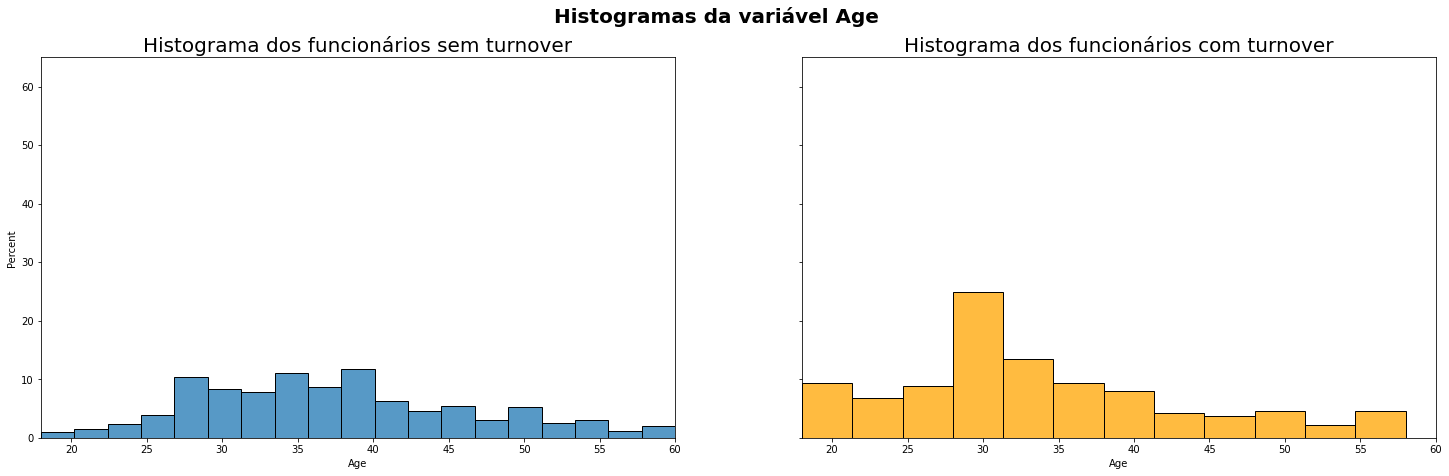

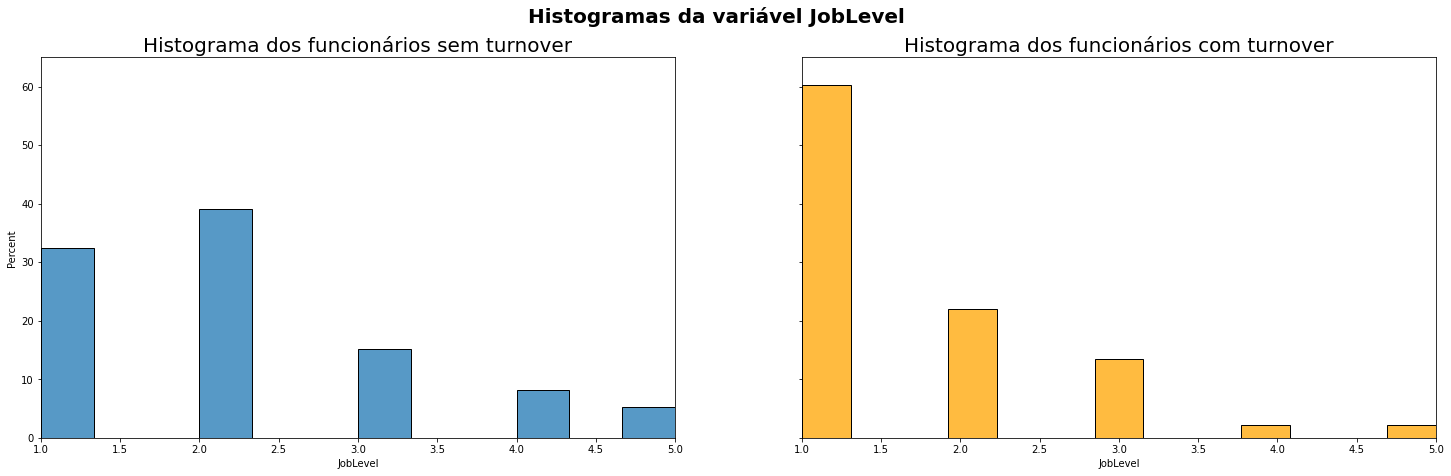

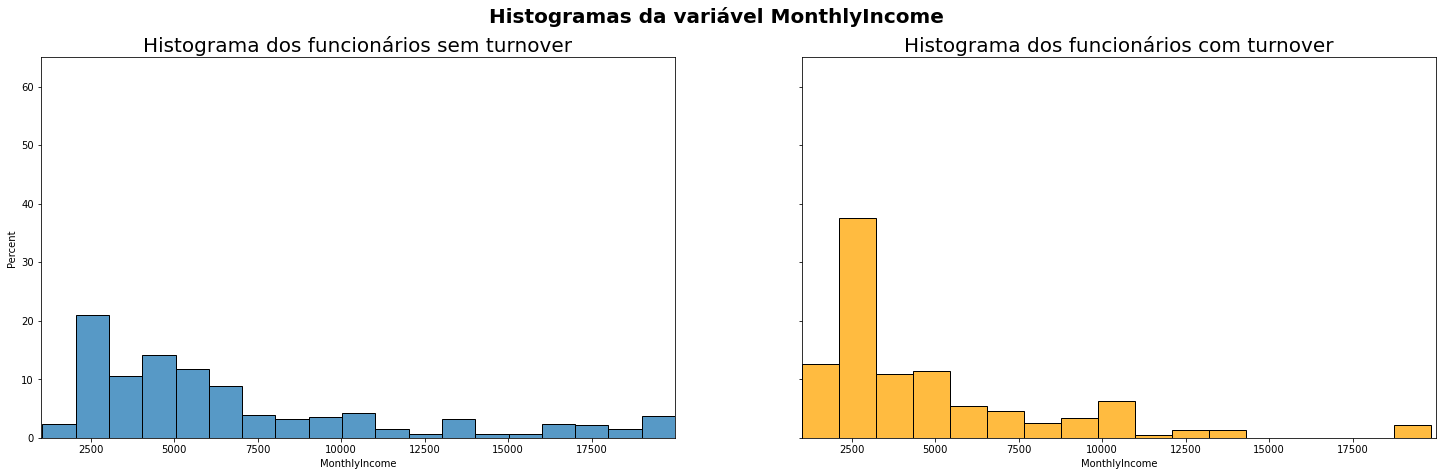

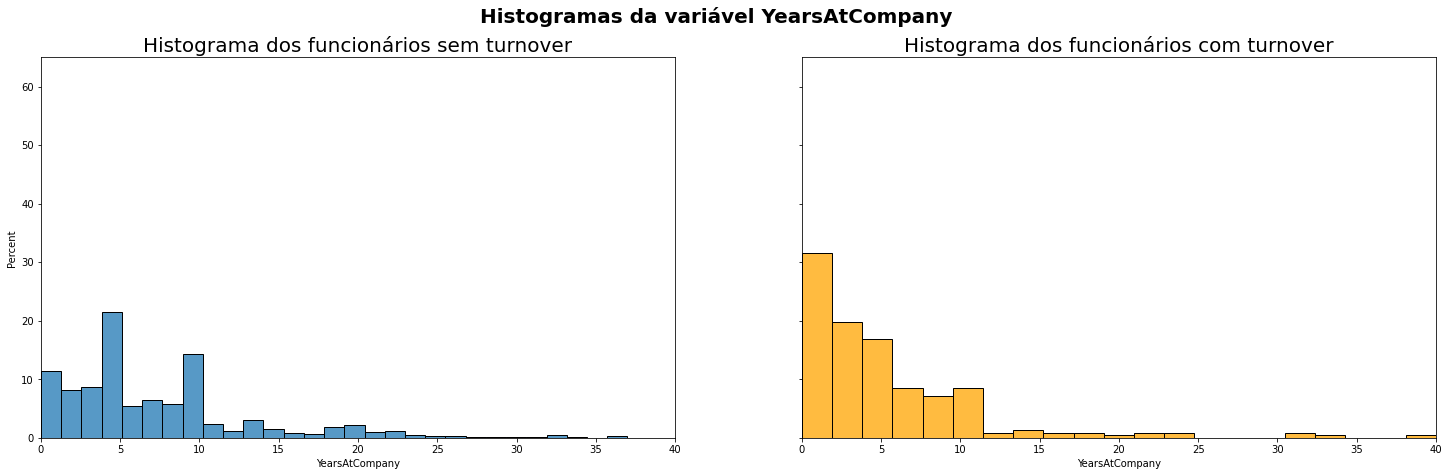

In [29]:
for column in columns:
    fig, axes = plt.subplots(1, 2, figsize=(25, 7), sharey=True)

    sns.histplot(data=dados.query('turnover == 0'), x=column, 
                stat='percent', ax=axes[0])

    sns.histplot(data=dados.query('turnover == 1'), x=column,
                stat='percent', ax=axes[1], color='orange')
    axes[0].set_title('Histograma dos funcionários sem turnover', fontsize=20)
    axes[1].set_title('Histograma dos funcionários com turnover', fontsize=20)
    axes[0].set_xlim(dados[column].min(), dados[column].max())
    axes[1].set_xlim(dados[column].min(), dados[column].max())
    plt.ylim(0, 65)
    plt.suptitle(f'Histogramas da variável {column}', fontsize=20, weight='bold')
    plt.show()

O histograma da variável `Age` mostra que o maior percentual de funcionários com turnover está na faixa dos 30 anos. O que mostra que os jovens tendem a sair da empresa com mais frequência.

Quanto ao nível do trabalho vemos que, entre os funcionários com turnover, cerca de 60% são do nível mais baixo da empresa. A medida que o nível de trabalho aumenta dimnui a taxa de funcionários com turnover. Isto pode ser reflexo da estabilidade adquirida a medida que o funcionário atinge níveis mais altos na empresa.

Cerca de 30% dos funcionários com turnover recebiam salários mensais próximos as U$S 2500,00 enquanto apenas 20% dos funcionários sem turnover recebem salários na mesma faixa. 

Quanto menor o tempo do funcionário da empresa maior a probabilidade dele dar turnover.

Assim, as variáveis selecionadas apontam que os funcionários que saem da empresa, aparentemente, estão em busca de trabalhos com melhores salários e oportunidade de crescimento. Pois, os dados apontam que o perfil dos funcionários que, com maior frequência, saem da empresa são jovens com poucos anos de carreira em níveis hierárquicos mais baixos e que recebem os salários médios mais baixos dentro da base de dados em estudo.

## Seleção de características


Antes de dar início a seleção dos atributos realizarei a conversão das colunas categóricas do tipo texto para categóricas numéricas. Conforme célula a seguir.

In [10]:
dicionario_classes = {
    'BusinessTravel' : {
        'Non-Travel' : 0,
        'Travel_Rarely' : 1,
        'Travel_Frequently' : 2
    },
    'Department' : {
        'Sales' : 0,
        'Research & Development' : 1,
        'Human Resources' : 2,
    },
    'EducationField' : {
        'Life Sciences' : 0,
        'Medical' : 1,
        'Marketing' : 2,
       'Technical Degree' : 3,
       'Human Resources' : 4,
       'Other' : 5, 
    },
    'Gender' : {
        'Female' : 0,
        'Male' : 1
    },
    'JobRole' : {
        'Sales Executive' : 0,
        'Research Scientist' : 1,
        'Laboratory Technician' : 2,
        'Manufacturing Director' : 3,
        'Healthcare Representative' : 4,
        'Manager' : 5,
        'Sales Representative' : 6,
        'Research Director' : 7,
        'Human Resources' : 8
    },
    'MaritalStatus' : {
        'Single' : 0,
        'Married' : 1,
        'Divorced' : 2
    },
    'OverTime' : {
        'No' : 0,
        'Yes' : 1
    }
}

dados.replace(dicionario_classes, inplace=True)
dados.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,turnover
0,41,1,1102,0,1,2,0,2,0,94,...,1,0,8,0,1,6,4,0,5,1
1,49,2,279,1,8,1,0,3,1,61,...,4,1,10,3,3,10,7,1,7,0
2,37,1,1373,1,2,2,5,4,1,92,...,2,0,7,3,3,0,0,0,0,1
3,33,2,1392,1,3,4,0,4,0,56,...,3,0,8,3,3,8,7,3,0,0
4,27,1,591,1,2,1,1,1,1,40,...,4,1,6,3,3,2,2,2,2,0


A seleção será realiza em duas etapas. Na primeira etapa verificarei se existe diferença significativa entre a distribuição das veriáveis entre os funcionários com e sem turnover, já na segunda etapa utilizare a função RFE para seleção das variáveis principais.


### Etapa de seleção 1

Nesta etapa verificarei se a distribuição de probabilidade das variáveis é a mesma para os funcionários com e sem turnover. Caso a distribuição de probabilidade seja a mesma significa que não há diferença significativa entre o perfil dos funcionários com e sem turnover e, portanto, tais variáveis não nos trazem informação útil.

Para verificar se existe diferença significativa entre as distribuições foi escolhida a estatística de soma de classificação de Wilcoxon para duas amostras. Disponível na biblioteca SciPy por meio do método `ranksums` contido no pacote `stats`. Tal função checa se duas amostras seguem a mesma distribuição ou não.

Neste teste esatístico são feitas duas hipóteses a hipótese nula e a hipótese alternativa descritas as seguir:

**H<sup>nula</sup>**

As amostras têm a mesma distribuição de probabilidade.

**H<sup>alternativa</sup>**

As duas amostras não têm a mesma distribuição de probabilidade.

Como resultado do teste é obtido o p-valor. Caso o p-valor seja menor que 0.05 nós temos índicios suficientes para rejeitar a hípotese nula.

In [11]:
# Realizando teste de distribuição de probabilidade

from scipy.stats import ranksums

funcionarios_com_turnover = dados.query('turnover == 1')
funcionarios_sem_turnover = dados.query('turnover == 0')
variaveis_descarte = []
variaveis_consideraveis = []
variaveis_object = []

for column in dados.columns:
    r = ranksums(funcionarios_com_turnover[column], funcionarios_sem_turnover[column])
    print('Teste de significância para a variável:', column)
    print(f'O valor de p-value é {r.pvalue:.3f}.')
    print('='*80)
    if r.pvalue <= 0.05:
        variaveis_consideraveis.append(column)
    else:
        variaveis_descarte.append(column)


Teste de significância para a variável: Age
O valor de p-value é 0.000.
Teste de significância para a variável: BusinessTravel
O valor de p-value é 0.000.
Teste de significância para a variável: DailyRate
O valor de p-value é 0.029.
Teste de significância para a variável: Department
O valor de p-value é 0.028.
Teste de significância para a variável: DistanceFromHome
O valor de p-value é 0.002.
Teste de significância para a variável: Education
O valor de p-value é 0.267.
Teste de significância para a variável: EducationField
O valor de p-value é 0.036.
Teste de significância para a variável: EnvironmentSatisfaction
O valor de p-value é 0.000.
Teste de significância para a variável: Gender
O valor de p-value é 0.338.
Teste de significância para a variável: HourlyRate
O valor de p-value é 0.798.
Teste de significância para a variável: JobInvolvement
O valor de p-value é 0.000.
Teste de significância para a variável: JobLevel
O valor de p-value é 0.000.
Teste de significância para a variáv

A variáveis consideradas relevantes pelo teste de distribuição foram:

In [12]:
variaveis_consideraveis

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'turnover']

### Segunda etapa da seleção de atributos

Nesta estapa será utilizada a função RFE para seleção das 8 variáveis principais, a partir das variáveis selecionadas anteriormente, utilizando-se como estimador o Random Forest.

In [13]:
dados2 = dados[variaveis_consideraveis]

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X = dados2.drop('turnover', axis=1)
y = dados2['turnover']

rf = RandomForestClassifier(random_state=10)
seletor = RFE(rf, n_features_to_select=8, step=1)
seletor = seletor.fit(X, y)
seletor.get_feature_names_out()

array(['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
       'OverTime', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsWithCurrManager'], dtype=object)

Por fim as 8 variáveis selecionadas para dar continuidade ao trabalho foram: Age, DailyRate, DistanceFromHome, MonthlyIncome, OverTime, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager.

Pode-se destacar que três das variáveis utilizadas no tópico anterior (Age,  MonthlyIncome, YearsAtCompany) foram selecionadas pelos métodos empregados. O que mostra que a intuição inicial, sobre quais seriam as características mais importantes, pode estar correta.

## Contrução de um modelo de árvore de decisão

Separação dos conjuntos X (variáveis independentes) e y (variável dependente).

In [15]:
variaves_selecionadas = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
                         'OverTime', 'TotalWorkingYears', 'YearsAtCompany',
                         'YearsWithCurrManager']
X = dados2[variaves_selecionadas]
y = dados2['turnover']

Observando-se a distribuição dos casos positivos e negativos de turnover na célula a seguir vemos que existe um desbalanceamento entre as classes.

In [16]:
dados2.turnover.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: turnover, dtype: float64

Como existe um desbalanceamento considerável entre as classes será utilizada validação cruzada dos dados (`cross_validade`) em conjunto com o método `StratifiedKFold`. O método `StratifiedKFold` é uma função do ScikitLearn que realiza a separação do conjunto de dados em k Folds buscando manter a proporcionalidade original das classes em cada Fold criado. 

Primeiramente serão construídos dois modelos de referência (`baseline`). Tais modelos são criados para termos um referencial mínimo que os mmodelos de árvore deverão superar. O primeiro será um modelo que "prevê" sempre a classe mais frequente.

In [28]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

dummy_prediction = np.zeros(y.shape)

print('A acurácia foi de %.2f.' % accuracy_score(y, dummy_prediction))
print('A precisão foi de %.2f.' % precision_score(y, dummy_prediction, zero_division=False))
print('A sensitividade foi de %.2f' % recall_score(y, dummy_prediction))

A acurácia foi de 0.84.
A precisão foi de 0.00.
A sensitividade foi de 0.00


O segundo modelo será feito utilizando o `DummyClassifier` do ScikitLearn. Este é um modelo simples que irá retornar a resultados aletórios de acordo a frequência das classes originais. Ou seja, neste caso 84% dos valores preditos serão 0 (zero) e 16% serão da classe 1, distribuídos aleatoriamente.

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

modelo = DummyClassifier(random_state=10, strategy="stratified")
skf = StratifiedKFold(n_splits=10)

clf = cross_validate(modelo, X, y, cv=skf, n_jobs=-1, scoring=['accuracy','precision','recall'])

print('A acurácia média foi de %.2f com desvio padrão de +- %.3f' % (clf['test_accuracy'].mean(), clf['test_accuracy'].std()))
print('A precisão média foi de %.2f com desvio padrão de +- %.3f' % (clf['test_precision'].mean(), clf['test_precision'].std()))
print('A sensitividade média foi de %.2f com desvio padrão de +- %.3f' % (clf['test_recall'].mean(), clf['test_recall'].std()))

A acurácia média foi de 0.74 com desvio padrão de +- 0.023
A precisão média foi de 0.11 com desvio padrão de +- 0.094
A sensitividade média foi de 0.08 com desvio padrão de +- 0.071


O primeiro baseline criado têm, como esperado, uma acurácia de 84% e precisão e sensitividade praticamente nulos. Já o segundo teve acurácia pior mas precisão e sensitividade melhores. Espera-se então que os modelos de árvore a serem criados sejam no mínimo superiores aos baselines criados.

A seguir é criada uma árvore de decisão utilizando a configuração padrão do ScikitLearn.

In [18]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=10)
skf = StratifiedKFold(n_splits=10)

clf = cross_validate(modelo, X, y, cv=skf, n_jobs=-1, scoring=['accuracy','precision','recall'])

print('A acurácia média foi de %.2f com desvio padrão de +- %.3f' % (clf['test_accuracy'].mean(), clf['test_accuracy'].std()))
print('A precisão média foi de %.2f com desvio padrão de +- %.3f' % (clf['test_precision'].mean(), clf['test_precision'].std()))
print('A sensitividade média foi de %.2f com desvio padrão de +- %.3f' % (clf['test_recall'].mean(), clf['test_recall'].std()))


A acurácia média foi de 0.79 com desvio padrão de +- 0.028
A precisão média foi de 0.36 com desvio padrão de +- 0.076
A sensitividade média foi de 0.38 com desvio padrão de +- 0.098


A acurácia do modelo é inferior a do baseline porém os valores de precisão e sensitividade passam a ser significativos.

Em seguida será criado uma árvore de decisão buscando-se otimizá-la através da alteração de alguns de seus hiperparâmetros. Para fazer a varredura das combinações de hiperparâmetros possíveis, dentro de limites estabelecidos, será utilizada a função `GridSearchCV`. Como parâmetro de otimização será utilizada a sensitividade (`recall`) pois, considero que, neste caso, os falsos negativos sejam piores que os falsos positivos.

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 4, 8, 16, 21, 24, None],
    'min_samples_leaf' : [1, 2, 4, 8, 16, 32, 64],
    'min_samples_split' : [2, 4, 8, 16, 32, 64]
}

modelo = DecisionTreeClassifier(random_state=10)

clf = GridSearchCV(modelo, parametros, cv=skf, scoring='recall')
clf.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 21, 24, None],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64],
                         'min_samples_split': [2, 4, 8, 16, 32, 64]},
             scoring='recall')

A seguir é mostrada a melhor configuração de árvore, de acordo com os critérios estabelecidos.

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_split=4, random_state=10)

Em seguida é realizado o processo para o cálculo das métricas de avaliação do melhor modelo escolhido.

In [ ]:
mbest = clf.best_estimator_
clf = cross_validate(mbest, X, y, cv=skf, n_jobs=-1, scoring=['accuracy','precision','recall'])

print('A acurácia média foi de %.2f com desvio padrão de +- %.3f' % (clf['test_accuracy'].mean(), clf['test_accuracy'].std()))
print('A precisão média foi de %.2f com desvio padrão de +- %.3f' % (clf['test_precision'].mean(), clf['test_precision'].std()))
print('A sensitividade média foi de %.2f com desvio padrão de +- %.3f' % (clf['test_recall'].mean(), clf['test_recall'].std()))

A acurácia média foi de 0.81 com desvio padrão de +- 0.028
A precisão média foi de 0.41 com desvio padrão de +- 0.090
A sensitividade média foi de 0.39 com desvio padrão de +- 0.083


Observa-se que houve uma pequena melhora no valor de sensitividade e redução do desvio padrão da mesma. Também houve um granho na precisão e na acurácia do modelo.

Embora o ganho de sensitivade seja pequeno a redução da complexidade do modelo, com a redução da profundidade da árvore, é algo que justifica o uso do novo modelo.

## Representação da árvore

A partir do procedimento anterior temos a configuração da melhor árvore de decisão possível de se obter com os dados utilizados `mbest`. Sua estrutura de decisão é exibida na célula a seguir. Por uma questão de visualização não são exibidos os 16 níveis da árvore.

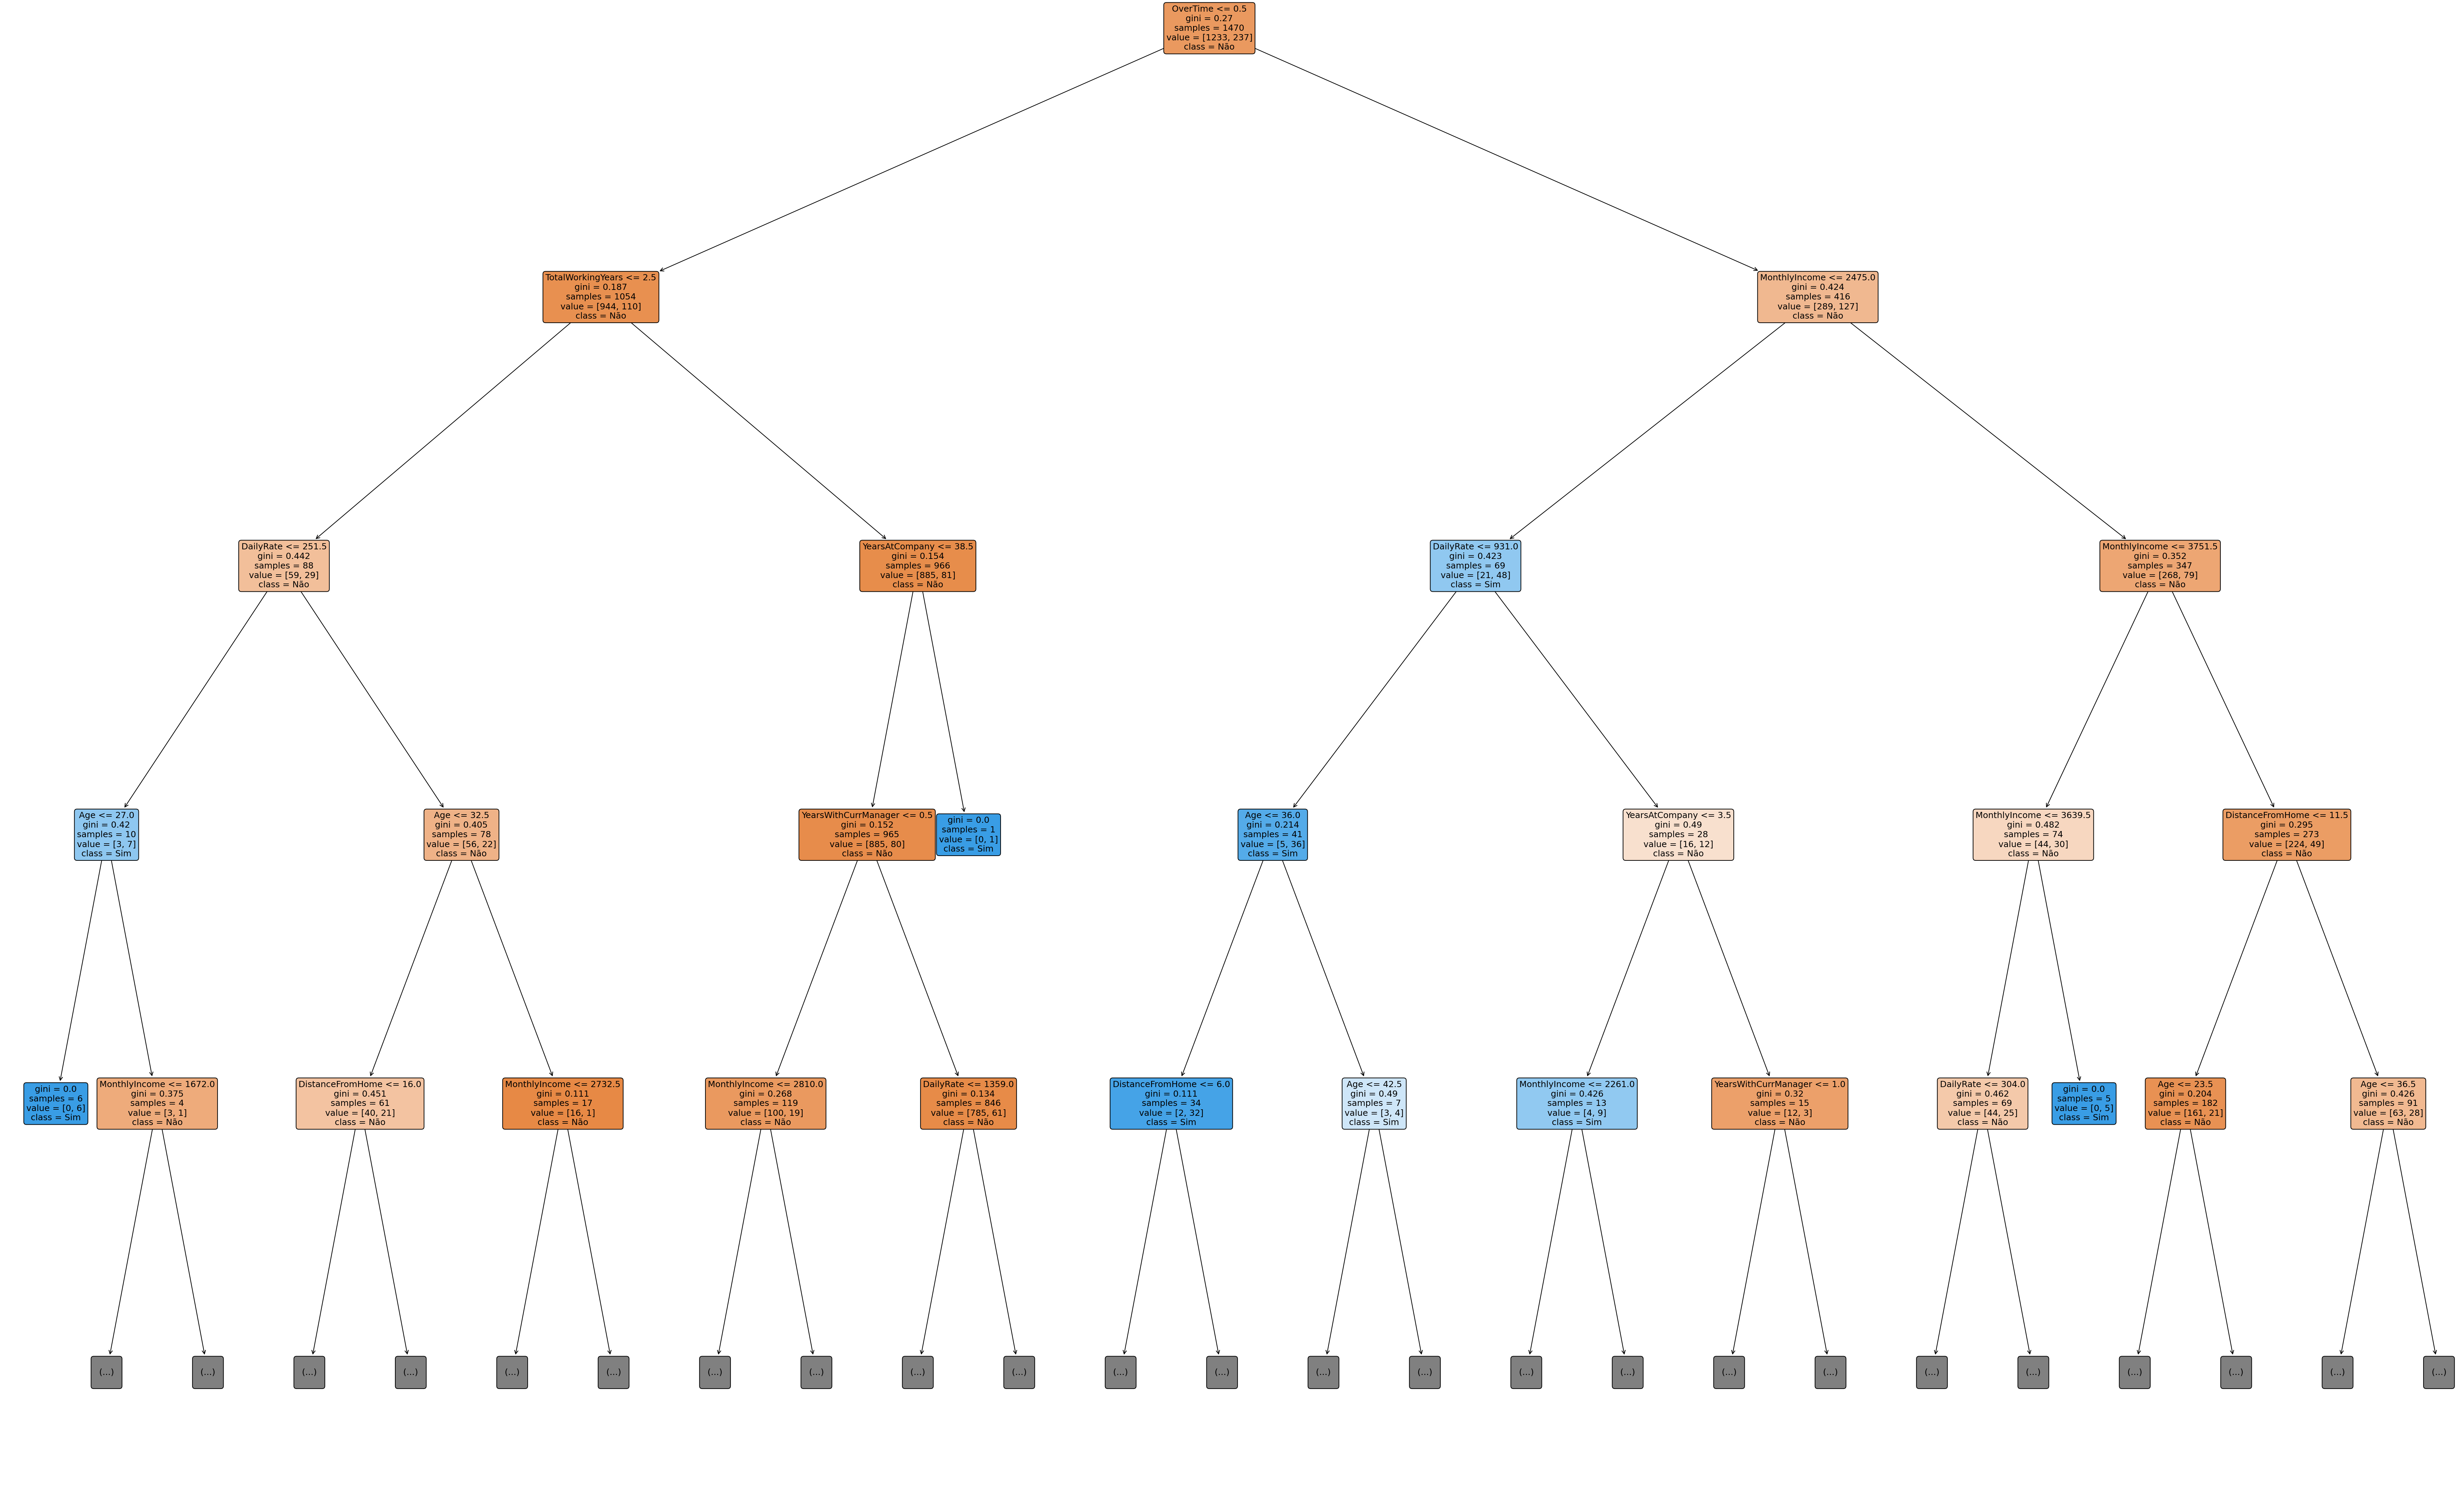

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 20), dpi=150)
plot_tree(mbest, max_depth=4, filled=True, rounded=True, feature_names=variaves_selecionadas, class_names=['Não', 'Sim'], fontsize=12);

O índice Gini mede o grau de heterogeneidade dos dados. É utilizado para medir a impureza de um nó. O índice em determinado nó é dado por:
$$ Gini = 1 - \sum_{i=1}^{c}{p_1 ^2}$$
Onde:</br>
$p_i$ é a frequência relativa de cada classe em cada nó.</br>
Quanto mais baixo o valor de Gini menos impureza existe no nó, ou seja, Gini igual a zero significa que o nó é puro. Por pureza entenda-se a existência de diferentes classes em um nó, portanto, um nó puro significa que ele contém exemplos de apenas uma classe. Da mesma forma quanto maior o valor de Gini maior o nível de impureza no nó.</br>
O uso do Gini, para particionar os nós de uma árvore de decisão binária, busca isolar em um ramo os registros referentes as classes mais frequentes.</br>

Desvantagens do Gini:</br>

**Viés da Amostra**: A validade do Gini pode depender do tamanho da amostra. Para variáveis pequenas tendem a ter menores valores de Gini enquanto amostras grandes tendem a valores maiores de Gini.</br>
**Imprecisão dos dados**: Caso existam dados imprecisos na base de dados pode-se causar distorções no índice de Gini calculado. </br>
**Degeneração**: Pode acontecer, embora não seja comum, que o valor de Gini seja o mesmo para diferentes distribuições. O que inevitavelmente causa degeneração do modelo.</br>
**Mudanças estruturais**: Mudanças populacionais e outras mudanças estruturais podem desviar o padrão de distribuição. </br>

Fontes: </br>
[Árvore de Decisão](https://www.maxwell.vrac.puc-rio.br/7587/7587_4.PDF)</br>
[Gini Index for Decision Trees: Introduction, Pros & Cons, Applications & Comparison](https://sociallykeeda.com/gini-index-for-decision-trees-introduction-pros-cons-applications-comparison/#Disadvantages_of_the_Gini_index)


## Conclusões

Recapitulando os resultados obtidos:

```
Baseline
A acurácia média foi de 0.74 com desvio padrão de +- 0.023
A precisão média foi de 0.11 com desvio padrão de +- 0.094
A sensitividade média foi de 0.08 com desvio padrão de +- 0.071
```

```
Melhor Árvore de Decisão
A acurácia média foi de 0.81 com desvio padrão de +- 0.028
A precisão média foi de 0.41 com desvio padrão de +- 0.090
A sensitividade média foi de 0.39 com desvio padrão de +- 0.083
```

<p align=Justify> modelo criado pode ser utilizado pelo setor de Recursos Humanos como ferramenta auxiliar na identificação de funcionários que possam estar insatisfeitos com a empresa e dispostos a sair. Porém, considerando-se as métricas de sensitividade e precisão obtidas teriamos apenas cerca de 40% de confiança na previsão do modelo, o que ainda assim é melhor que a estimativa inicial do baseline. Desta forma o modelo deveria ser utilizado como ferramenta auxiliar à tomada de decisões da equipe de Recursos Humanos, o que poderia aumentar a taxa de retenção de funcionários, e não como ferramenta principal e única na tomada de decisão.</p>

<p align=justify>A obtenção de um modelo de um modelo com  100% de acurácia seria possível apenas se o caso em análise fosse muito simples e de natureza determinística como por exemplo: se eu lançar uma bola para o alto em algum momento ela irá cair no chão. O caso apresentado para solução é muito complexo, existem muitas variáveis envolvidas e a relação entre elas, se existir, não é clara. O perfil geral dos funcionários que saem ou permanecem na empresa é parecido e ainda temos o fato de a parcela de funcionários que saem da empresa ser pequena, quando comparada com o percentual de funcionários que permanecem na empresa. Apenas se tivessemos conhecimentos do perfil de todos os funcionários do mundo poderiamos chegar a um modelo de melhor classificação mas, ainda assim, a complexidade existente entre as variáveis tornaria difícil uma taxa de 100% de acertos. Contudo, podemos esperar que a medida que novos casos sejam adicionados a nossa base de dados possamos retreinar o modelo e provavelmente encontrar melhores resultados.</p>